# COMANDOS AUXILIARES

# 0. Imports

In [1]:
import pandas  as pd
import numpy   as np
import seaborn as sns
import locale
import math

from matplotlib import pyplot as plt

# 1. Aux Functions

In [2]:
# adjust image size
sns.set(rc={'figure.figsize':(15,8)})

# define color palette
palette = sns.color_palette(['#8A2BE2', '#A020F0', '#9932CC', '#800080', '#4B0082'], 3)

In [3]:
def create_km_class(kms):
    
    '''function that creates classes based on covered km (each 5k kms)'''

    return math.ceil(kms/5000)

In [4]:
def create_company_name(name, companies):
    '''function that will verify the manufacturer of each motorcycle in the data'''
    
    splitted_name = name.split(' ')

    for company in companies:
        if company in splitted_name:
            return company

In [5]:
def isolate_name(name, manufacturer):
    '''function that remove the manufacturer of the motorcycle name'''

    splitted_name = name.split(' ')
    
    if manufacturer in splitted_name:
        splitted_name.remove(manufacturer)
        return ' '.join(splitted_name) # [dio, 13]
    else:
        return name

# 2. Project Kickoff!

## 2.1 Context and Business Problem

Xtreme Groovy Bikes Sales is a motorcycle resale company. Its business model is to resell used motorcycles. With the rising value of used vehicles, XGB Sales, as it is known, wants to expand its business. You have been hired as a data scientist by XGB Sales to help them find the best motorcycles for resale.

To do this, the company's CEO has carried out a market study and given you a database so that you can help him find the best motorcycles for resale, thus increasing the company's profits.

In addition, the CEO has asked you a few questions about the database the company has. Remember that the context, people and questions are completely fictitious.

## 2.2 The Challenge

### 2.2.1 First Round of questions

So the CEO of XGB Sales raised the following questions:

1. How many motorcycles do we have in the Dataset?
2. What is the year of the oldest motorcycle in the database?
3. What is the year of the newest motorcycle in the database?
4. What is the value of the most expensive motorcycle in the database?
5. What is the value of the hodomoter of the motorcycle with the highest mileage?
6. What is the hodomoter value of the motorcycle with the lowest mileage?
7. Of the motorcycles on display in a showroom, what is the highest value recorded in the database?
8. Of the motorcycles on display in a showroom, what is the lowest value recorded in the database?
9. How many motorcycles are being sold by their owners and how many are being sold by other dealers?
10. What is the average value of the motorcycles in the database?
11. What is the average year of the motorcycles registered in the database?
12. What is the average mileage of the motorcycles registered in the database?
13. How many motorcycles in the database belong to a single owner?
14. Are the bikes with the lowest mileage the cheapest bikes in the Dataset?


### 2.2.2 Second Round of questions

After analyzing the answers to the previous questions, the CEO of XGB Sales asked a few more questions:

1. Are bikes that have only had one owner more expensive on average than bikes that have had more owners?
2. Are the bikes that have had more owners the bikes that have a higher average mileage than the bikes that have had fewer owners?
3. Are the bikes that have had the most owners the oldest bikes on average?
4. Are motorcycles sold by dealers more expensive on average than motorcycles sold by their owners?
5. The CEO has given you a new dataset called companies.csv, which contains all the motorcycle manufacturers. Add a column to the DataFrame with the name company. This column should contain the name of the manufacturer of each motorcycle in the DataFrame.
6. Create a new dataset called bikes_completed.csv from the DataFrame with the company column filled in.
7. Which manufacturers have the most bikes registered in the complete database?

### 2.2.3 Third Round of Queestions

After analyzing the answers to the previous questions, the CEO of XGB Sales asked a few more questions:

1. Adjust the `name` column so that it only contains the name of the bike.
2. Which manufacturer has the highest average price for their bikes?
3. Which manufacturer has the bike with the highest mileage?
4. Which manufacturer has the oldest motorcycle?
5. The manufacturer with the most expensive motorcycle in the Dataset is also the manufacturer with the fewest registered motorcycles?
6. Which manufacturer has the smallest variation in sales value?
7. Which bikes should I buy?
- Bear in mind that I want motorcycles that are no more than 3 years old; have no more than 40,000 kilometers on the clock; have only one owner; are being sold by individuals and have a sales price lower than the showroom price. Send a report containing the model, selling price, mileage and year, sorted by selling price in descending order to my e-mail address.

## 2.3 The database

The dataset representing the context is available on the Kaggle platform. The link to access the data: [Motorcycle Dataset](https://www.kaggle.com/datasets/nehalbirla/motorcycle-dataset)

It can also be found in the `data` directory of this project.

# 3. Data Preparation

## 3.1 Load Data

In [6]:
df_raw = pd.read_csv('../data/raw/bike.csv')
df_raw.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [7]:
df_companies = pd.read_csv('../data/raw/companies.csv')
df_companies.head(10)

,Unnamed: 0,company_name
0,0,Accura
1,1,Adventure Wheels
2,2,Altius
3,3,Amez
4,4,Ampere
5,5,Aprilia
6,6,Atlas
7,7,Avan
8,8,Avantura
9,9,Avon


## 3.2 Data Description

In [8]:
df2 = df_raw.copy()

In [9]:
# data dimensions
print(f'{df2.shape[0]} rows and {df2.shape[1]} columns')

1061 rows and 7 columns


In [10]:
# data types
df2.dtypes

name                  object
selling_price          int64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object

In [11]:
# check na's
df2.isna().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

## 3.3 Data Preparation

In [12]:
df3 = df2.copy()

In [13]:
# creating a traveled km classification
df3['5k_kms'] = df3['km_driven'].apply(lambda x: create_km_class(x))
df3.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,5k_kms
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,1
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,2
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,3
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,5
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,5


In [14]:
# create an id column using index
df3 = df3.reset_index().rename({'index':'id'}, axis=1)
df3.head()

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,5k_kms
0,0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,1
1,1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,2
2,2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,3
3,3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,5
4,4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,5


In [15]:
# create bike age (assuming this database is from 2020)
max_year = df3['year'].max()

df3['bike_age'] = df3['year'].apply(lambda x: max_year - x)
df3.head()

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,5k_kms,bike_age
0,0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,1,1
1,1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,2,3
2,2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,3,2
3,3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,5,5
4,4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,5,9


# 4. Answering the Questions

In [16]:
df4 = df3.copy()

## 4.1 First Round

### 1. How many motorcycles do we have in the Dataset?



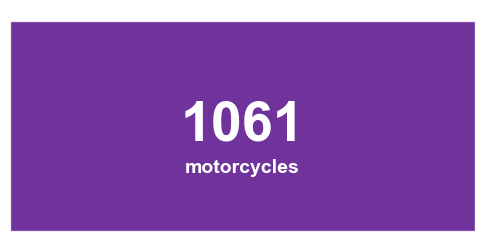

In [17]:
# get the number of motorcycles
motos_n = df4.shape[0]

# creat an empty figure
plt.figure(figsize=(6, 3))

# remove axis
plt.axis('off')

# add a background color
plt.axhspan(0, 1, facecolor='indigo', alpha=0.8)

# plot number of motos
plt.text(x=0.5, y=0.5, s=str(motos_n), ha='center', va ='center', fontsize=40, fontweight='bold', color='white')
plt.text(x=0.5, y=0.30, s='motorcycles', ha='center', va ='center', fontsize=14, fontweight='bold', color='white')

plt.show()

### 2. What is the year of the oldest motorcycle in the database?

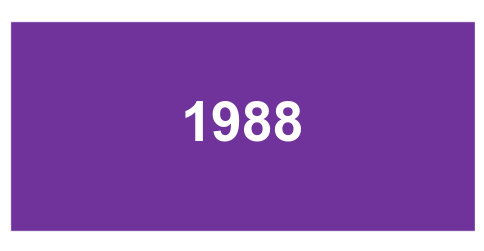

In [18]:
# get the year of the oldest motorcycle
oldst_moto = df4['year'].min()

# creat an empty figure
plt.figure(figsize=(6, 3))

# remove axis
plt.axis('off')

# add a background color
plt.axhspan(0, 1, facecolor='indigo', alpha=0.8)

# plot number of motos
plt.text(x=0.5, y=0.5, s=str(oldst_moto), ha='center', va ='center', fontsize=40, fontweight='bold', color='white')

plt.show()

### 3. What is the year of the newest motorcycle in the database?

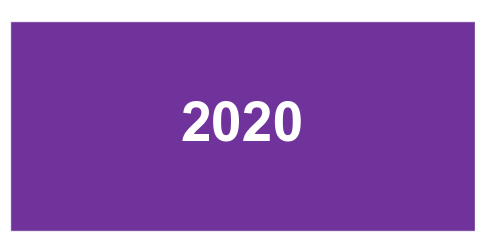

In [19]:
# get the year of the newest moto
nwst_moto = df4['year'].max()

# creat an empty figure
plt.figure(figsize=(6, 3))

# remove axis
plt.axis('off')

# add a background color
plt.axhspan(0, 1, facecolor='indigo', alpha=0.8)

# plot number of motos
plt.text(x=0.5, y=0.5, s=str(nwst_moto), ha='center', va ='center', fontsize=40, fontweight='bold', color='white')

plt.show()

### 4. What is the value of the most expensive motorcycle in the database?


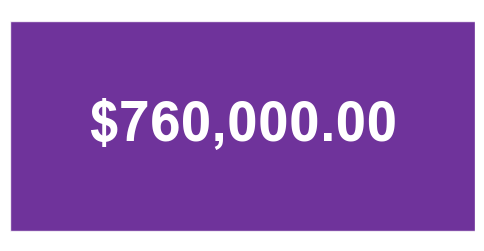

In [20]:
# get the value of the most expensive moto
exp_moto = df4['selling_price'].max()

# define the regional setting for the wanted numerical format
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# format the value for currency
formatted_exp_moto = locale.currency(exp_moto, grouping=True, symbol=True)

# creat an empty figure
plt.figure(figsize=(6, 3))

# remove axis
plt.axis('off')

# add a background color
plt.axhspan(0, 1, facecolor='indigo', alpha=0.8)

# plot number of motos
plt.text(x=0.5, y=0.5, s=formatted_exp_moto, ha='center', va ='center', fontsize=40, fontweight='bold', color='white')

plt.show()


### 5. What is the value of the hodomoter of the motorcycle with the highest mileage?

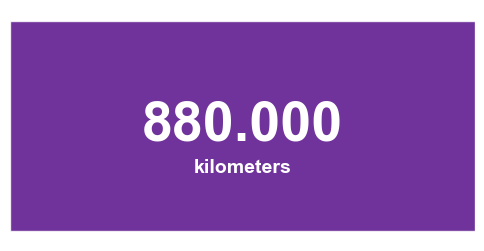

In [21]:
# get the highest mileage
hst_km = df4['km_driven'].max()

# set the regional setting for the wanted value format
locale.setlocale(locale.LC_ALL, '')

# format the value
formatted_hst_km = locale.format_string('%d', hst_km, grouping=True)

# creat an empty figure
plt.figure(figsize=(6, 3))

# remove axis
plt.axis('off')

# add a background color
plt.axhspan(0, 1, facecolor='indigo', alpha=0.8)

# plot number of motos
plt.text(x=0.5, y=0.5, s=formatted_hst_km, ha='center', va ='center', fontsize=40, fontweight='bold', color='white')
plt.text(x=0.5, y=0.30, s='kilometers', ha='center', va ='center', fontsize=14, fontweight='bold', color='white')

plt.show()

### 6. What is the hodomoter value of the motorcycle with the lowest mileage?

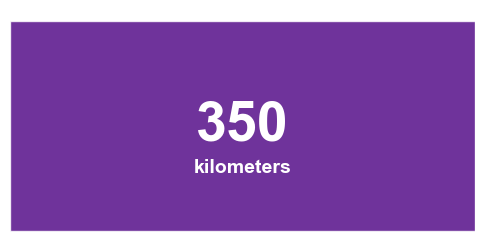

In [22]:
# get the lowest mileage
lwst_km = df4['km_driven'].min()

# creat an empty figure
plt.figure(figsize=(6, 3))

# remove axis
plt.axis('off')

# add a background color
plt.axhspan(0, 1, facecolor='indigo', alpha=0.8)

# plot number of motos
plt.text(x=0.5, y=0.5, s=str(lwst_km), ha='center', va ='center', fontsize=40, fontweight='bold', color='white')
plt.text(x=0.5, y=0.30, s='kilometers', ha='center', va ='center', fontsize=14, fontweight='bold', color='white')

plt.show()

### 7. Of the motorcycles on display in a showroom, what is the highest value recorded in the database?

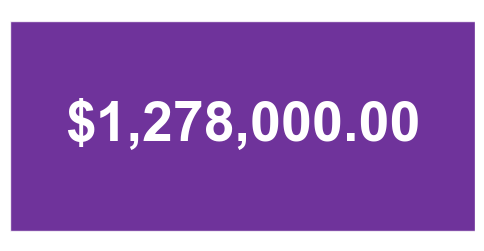

In [23]:
# get motorcycles that have showroom price
df_aux = df4[~df4['ex_showroom_price'].isna()]

# get the highest showroom price
show_hvalue = df_aux['ex_showroom_price'].max()

# define the regional setting for the wanted numerical format
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# format the value for currency
formatted_show_hvalue = locale.currency(show_hvalue, grouping=True, symbol=True)

# creat an empty figure
plt.figure(figsize=(6, 3))

# remove axis
plt.axis('off')

# add a background color
plt.axhspan(0, 1, facecolor='indigo', alpha=0.8)

# plot number of motos
plt.text(x=0.5, y=0.5, s=formatted_show_hvalue, ha='center', va ='center', fontsize=40, fontweight='bold', color='white')

plt.show()

### 8. Of the motorcycles on display in a showroom, what is the lowest value recorded in the database?

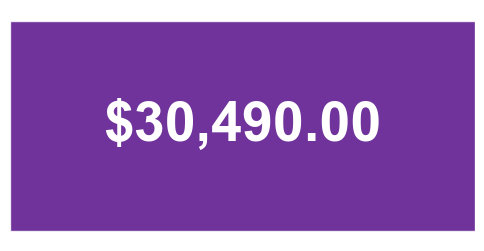

In [24]:
# get the lowest showroom price
show_lvalue = df_aux['ex_showroom_price'].min()

# define the regional setting for the wanted numerical format
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# format the value for currency
formatted_show_lvalue = locale.currency(show_lvalue, grouping=True, symbol=True)

# creat an empty figure
plt.figure(figsize=(6, 3))

# remove axis
plt.axis('off')

# add a background color
plt.axhspan(0, 1, facecolor='indigo', alpha=0.8)

# plot number of motos
plt.text(x=0.5, y=0.5, s=formatted_show_lvalue, ha='center', va ='center', fontsize=40, fontweight='bold', color='white')

plt.show()

### 9. How many motorcycles are being sold by their owners and how many are being sold by other dealers?

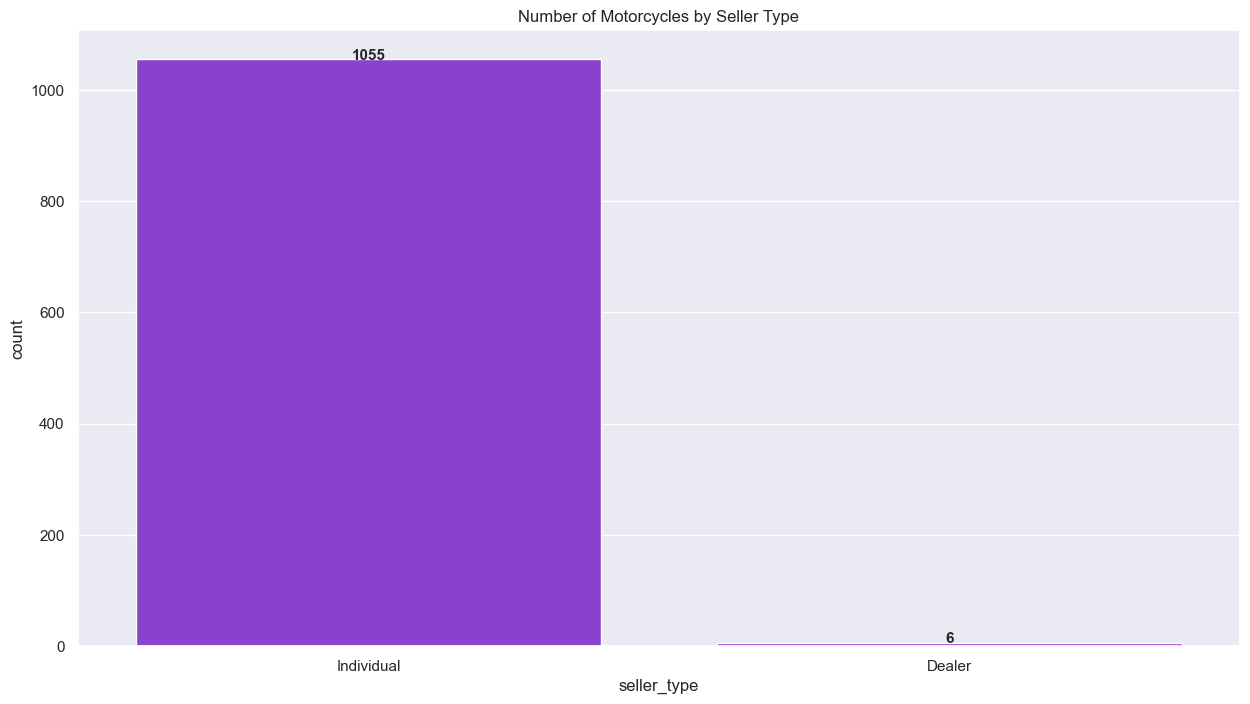

In [25]:
# count seller types
df_aux = df4['seller_type'].value_counts().reset_index().rename(columns={'seller_type': 'count', 'index':'seller_type'})

# barplot
ax= sns.barplot(data=df_aux, x='seller_type', y='count', palette=palette)
plt.title('Number of Motorcycles by Seller Type')

# display value lables
for index, row in df_aux.iterrows():
    ax.text(index, row['count'] + 0.2, row['count'], ha='center', fontsize=11, fontweight='bold')

plt.show()

### 10. What is the average value of the motorcycles in the database?

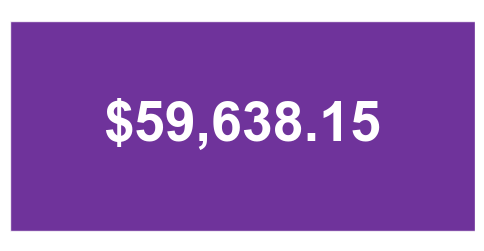

In [26]:
# get the average moto value
avg_price = round(df4['selling_price'].mean(), 2)

# define the regional setting for the wanted numerical format
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# format the value for currency
formatted_avg_price = locale.currency(avg_price, grouping=True, symbol=True)

# creat an empty figure
plt.figure(figsize=(6, 3))

# remove axis
plt.axis('off')

# add a background color
plt.axhspan(0, 1, facecolor='indigo', alpha=0.8)

# plot number of motos
plt.text(x=0.5, y=0.5, s=formatted_avg_price, ha='center', va ='center', fontsize=40, fontweight='bold', color='white')

plt.show()

### 11. What is the average year of the motorcycles registered in the database?

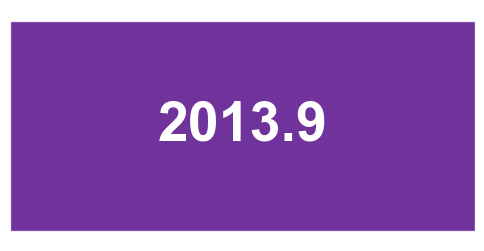

In [27]:
# get the lowest mileage
avg_year = round(df4['year'].mean(), 1)

# set the regional setting for the wanted value format
locale.setlocale(locale.LC_ALL, '')

# format the value
formatted_avg_year = locale.format_string('%d', avg_year, grouping=True)

# creat an empty figure
plt.figure(figsize=(6, 3))

# remove axis
plt.axis('off')

# add a background color
plt.axhspan(0, 1, facecolor='indigo', alpha=0.8)

# plot number of motos
plt.text(x=0.5, y=0.5, s=avg_year, ha='center', va ='center', fontsize=40, fontweight='bold', color='white')

plt.show()

### 12. What is the average mileage of the motorcycles registered in the database?

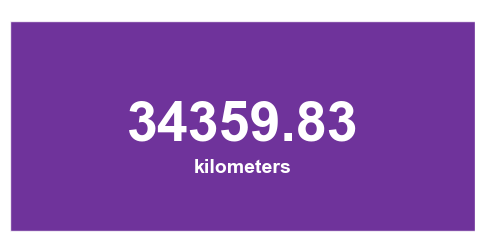

In [28]:
# get the average motorcycle kilometers
avg_kms = round(df4['km_driven'].mean(), 2)

# set the regional setting for the wanted value format
locale.setlocale(locale.LC_ALL, '')

# format the value
formatted_avg_kms = locale.format_string('%d', avg_kms, grouping=True)

# creat an empty figure
plt.figure(figsize=(6, 3))

# remove axis
plt.axis('off')

# add a background color
plt.axhspan(0, 1, facecolor='indigo', alpha=0.8)

# plot number of motos
plt.text(x=0.5, y=0.5, s=avg_kms, ha='center', va ='center', fontsize=40, fontweight='bold', color='white')
plt.text(x=0.5, y=0.30, s='kilometers', ha='center', va ='center', fontsize=14, fontweight='bold', color='white')

plt.show()

### 13. How many motorcycles in the database belong to a single owner?

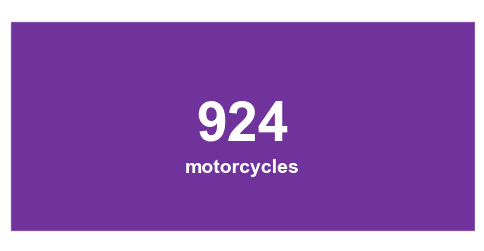

In [29]:
# obtain the number of motos owned by a sinfle owner
single_owners = df4[df4['owner'] == '1st owner'].shape[0]

# creat an empty figure
plt.figure(figsize=(6, 3))

# remove axis
plt.axis('off')

# add a background color
plt.axhspan(0, 1, facecolor='indigo', alpha=0.8)

# plot number of motos
plt.text(x=0.5, y=0.5, s=str(single_owners), ha='center', va ='center', fontsize=40, fontweight='bold', color='white')
plt.text(x=0.5, y=0.30, s='motorcycles', ha='center', va ='center', fontsize=14, fontweight='bold', color='white')

plt.show()

### 14. Are the bikes with the lowest mileage the cheapest bikes in the Dataset?

In [30]:
df_aux1 = df4[['5k_kms', 'selling_price']].groupby('5k_kms').mean()
df_aux2 = df4[['5k_kms', 'id']].groupby('5k_kms').count()

df_aux1.join(df_aux2).reset_index().sort_values(by='selling_price', ascending=False).head(10)

,5k_kms,selling_price,id
0,1,124564.705882,85
26,69,120000.000000,1
1,2,87146.448000,125
2,3,79736.842105,114
24,48,70000.000000,1
3,4,60780.000000,125
4,5,53799.845361,97
6,7,45649.983333,60
7,8,45604.494382,89
5,6,44985.057471,87


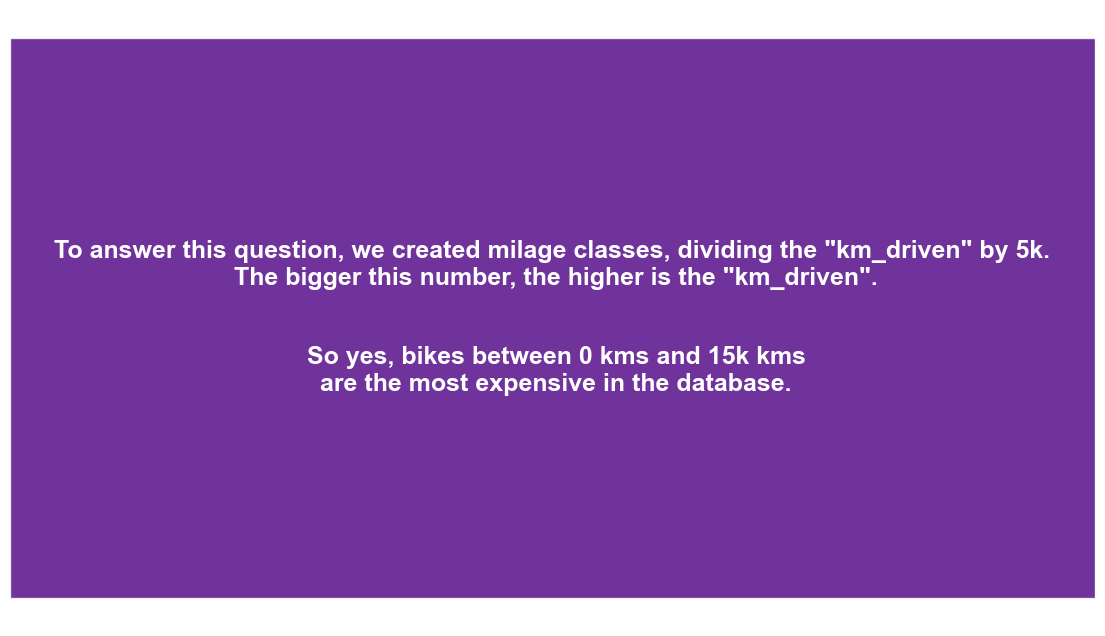

In [31]:
# creat an empty figure
plt.figure(figsize=(14, 8))

# remove axis
plt.axis('off')

# add a background color
plt.axhspan(0, 1, facecolor='indigo', alpha=0.8)

text = 'To answer this question, we created milage classes, dividing the "km_driven" by 5k.\n The bigger this number, the higher is the "km_driven".\n\n\n So yes, bikes between 0 kms and 15k kms\n are the most expensive in the database.'

# plot number of motos
plt.text(x=0.5, y=0.5, s=text, ha='center', va ='center', fontsize=18, fontweight='bold', color='white')

plt.show()

## 4.2 Second Round

### 1. Are bikes that have had one owner, more expensive on average than bikes that have had more owners?

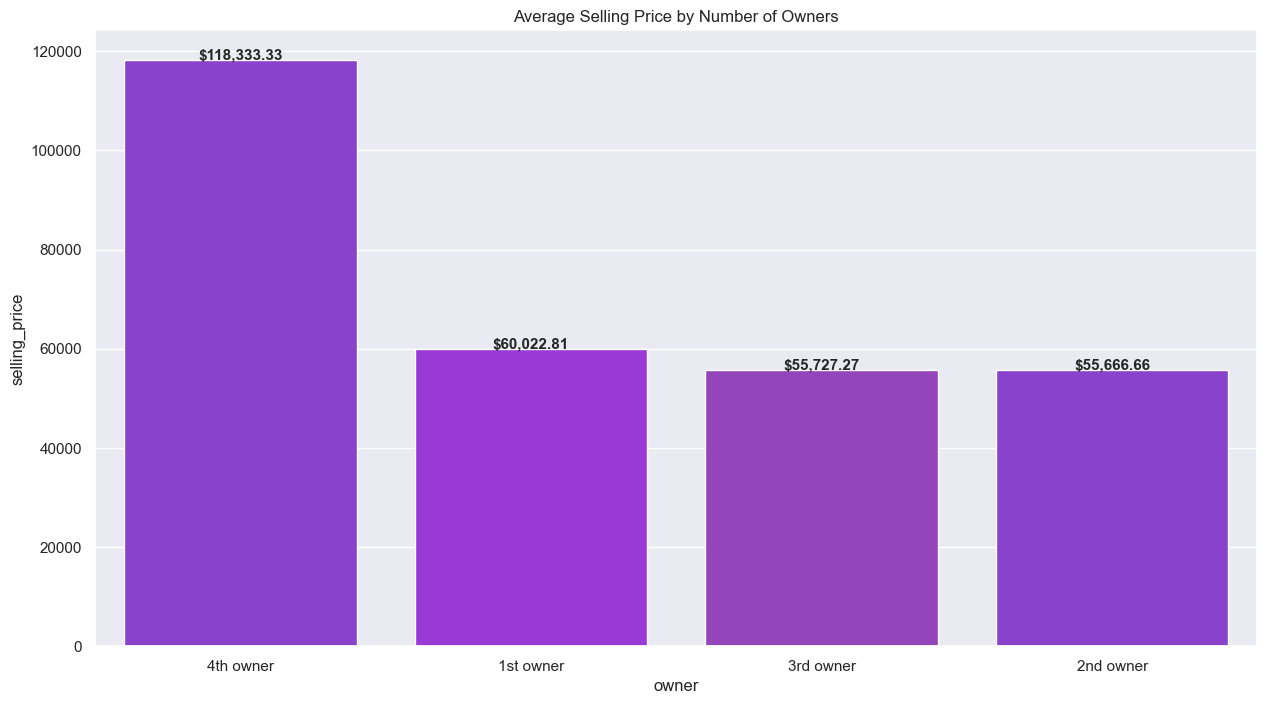

In [32]:
# get average price by number of owners
df_aux = df4[['owner', 'selling_price']].groupby('owner').mean().reset_index().sort_values(by='selling_price', ascending=False)

# define the regional setting for the wanted numerical format
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# barplot
ax= sns.barplot(data=df_aux, x='owner', y='selling_price', palette=palette)
plt.title('Average Selling Price by Number of Owners')

# display value lables
for p in ax.patches:
    height = p.get_height()
    formatted_values = locale.currency(height, grouping=True, symbol=True)
    ax.text(p.get_x() + p.get_width() / 2, height + 100, formatted_values, ha='center', fontsize=11, fontweight='bold')

plt.show()

### 2. For the bikes that have had more owners, do they have a higher average mileage than the bikes that have had fewer owners?

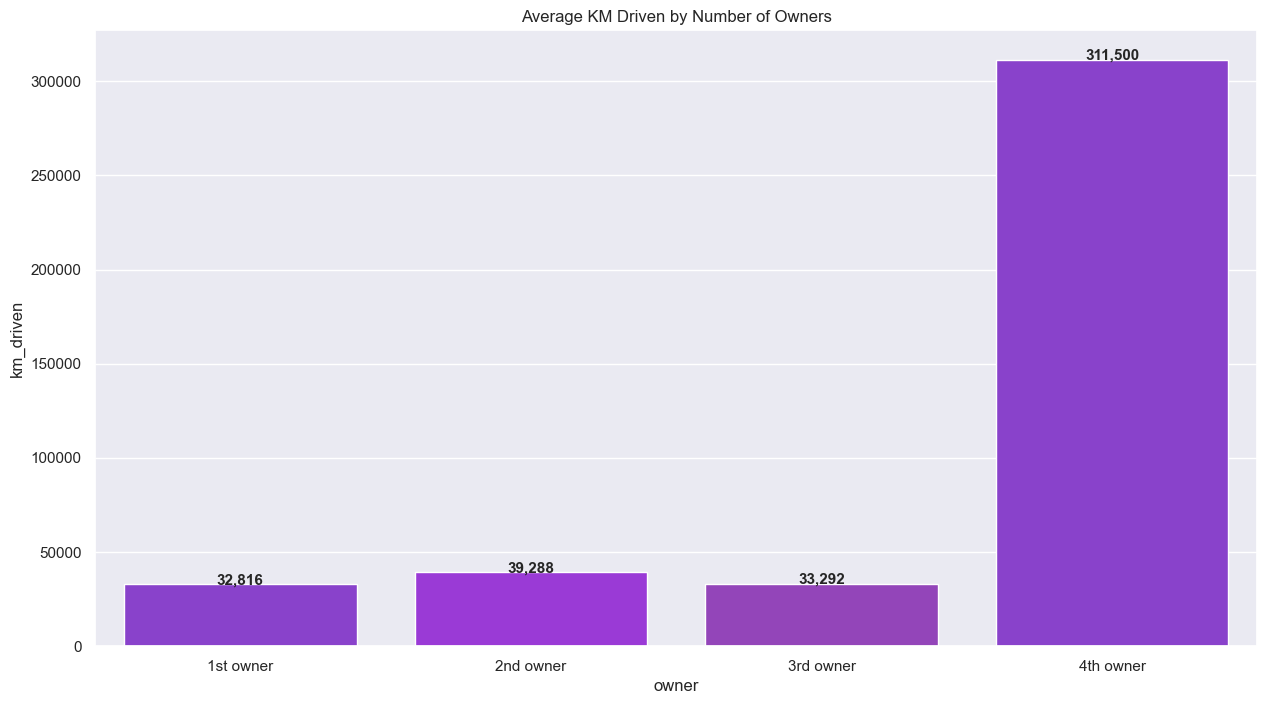

In [33]:
# get average km_driven by number of owners
df_aux = df4[['owner', 'km_driven']].groupby('owner').mean().reset_index()

# define the regional setting for the wanted numerical format
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# barplot
ax= sns.barplot(data=df_aux, x='owner', y='km_driven', palette=palette)
plt.title('Average KM Driven by Number of Owners')

# display value lables
for p in ax.patches:
    height = p.get_height()
    formatted_values = locale.format_string('%d', height, grouping=True)
    ax.text(p.get_x() + p.get_width() / 2, height + 100, formatted_values, ha='center', fontsize=11, fontweight='bold')

plt.show()

### 3. Are the bikes that have had the more owners, the oldest bikes on average?

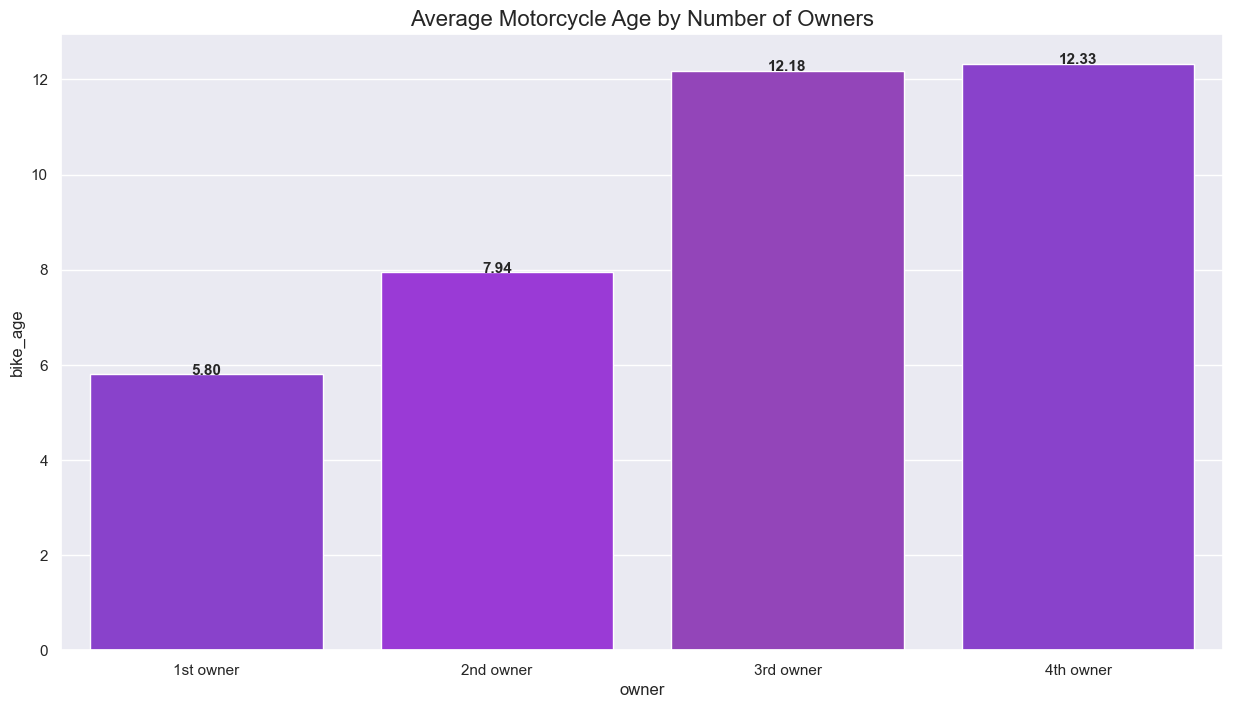

In [34]:
# get average moto age by owner
df_aux = df4[['owner', 'bike_age']].groupby('owner').mean().reset_index()

# define the regional setting for the wanted numerical format
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# barplot
ax = sns.barplot(data=df_aux, x='owner', y='bike_age', palette=palette)
plt.title('Average Motorcycle Age by Number of Owners', fontsize=16)

# display value lables
for index, row in df_aux.iterrows():
    formatted_value = f'{row["bike_age"]:.2f}' 
    ax.text(index, row['bike_age'], formatted_value, ha='center', fontsize=11, fontweight='bold')

plt.show()

### 4. Are motorcycles sold by dealers more expensive on average than motorcycles sold by their owners?

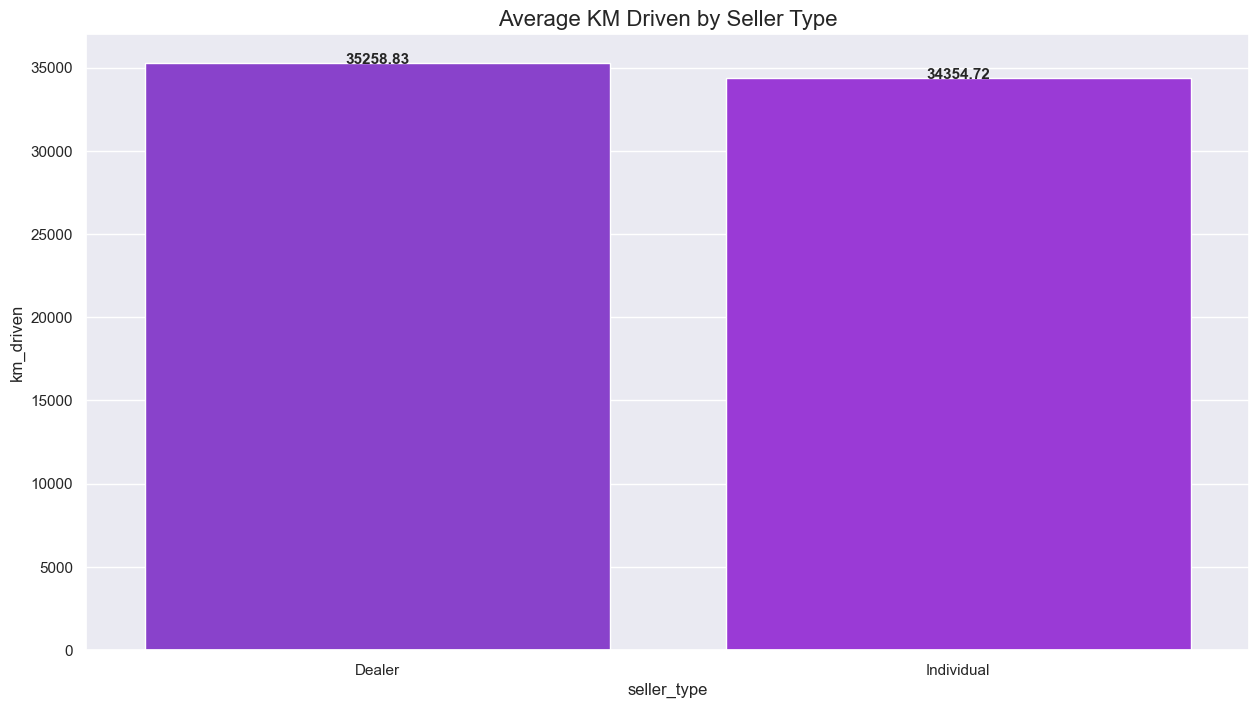

In [35]:
# get average km_driven by selletr type
df_aux = df4[['seller_type', 'km_driven']].groupby('seller_type').mean().reset_index()

# define the regional setting for the wanted numerical format
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# barplot
ax = sns.barplot(data=df_aux, x='seller_type', y='km_driven', palette=palette)
plt.title('Average KM Driven by Seller Type', fontsize=16)

# display value lables
for index, row in df_aux.iterrows():
    formatted_value = f'{row["km_driven"]:.2f}' 
    ax.text(index, row['km_driven'], formatted_value, ha='center', fontsize=11, fontweight='bold')

plt.show()

### 5. The CEO has given you a new dataset called companies.csv, which contains all the motorcycle manufacturers. Add a column to the DataFrame with the name company. This column should contain the name of the manufacturer of each motorcycle in the DataFrame.

In [36]:
companies = df_companies['company_name'].to_list()

df4['manufacturer'] = df4['name'].apply(lambda x: create_company_name(x, companies))
df4.sample(10)

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,5k_kms,bike_age,manufacturer
96,96,Yamaha FZ25,150000,2019,Individual,1st owner,2500,133680.0,1,1,Yamaha
888,888,Royal Enfield Thunderbird 350,120000,2015,Individual,1st owner,10000,NaN,2,5,None
844,844,Bajaj Discover 100 T,20000,2013,Individual,1st owner,20000,47032.0,4,7,Bajaj
616,616,Yamaha YZF R15 S,70000,2017,Individual,1st owner,16000,117926.0,4,3,Yamaha
752,752,Hero Xtreme [2013-2014],45000,2013,Individual,1st owner,57000,75936.0,12,7,Hero
210,210,Yamaha FZ S [2012-2016],42000,2013,Individual,1st owner,60000,79432.0,12,7,Yamaha
199,199,Yamaha Ray Z,35000,2015,Individual,1st owner,15500,52949.0,4,5,Yamaha
894,894,TVS Victor,18000,2004,Individual,1st owner,46700,54852.0,10,16,TVS
267,267,Hero Xpulse 200,90000,2019,Individual,1st owner,8600,107500.0,2,1,Hero
668,668,Yamaha FZ16,40000,2016,Individual,1st owner,93000,78712.0,19,4,Yamaha


### 6. Create a new dataset called bikes_completed.csv from the DataFrame with the company column filled in.

In [37]:
df4.to_csv('../data/processed/bikes_completed.csv', index=False)

### 7. Which manufacturers have the most bikes registered in the complete database?

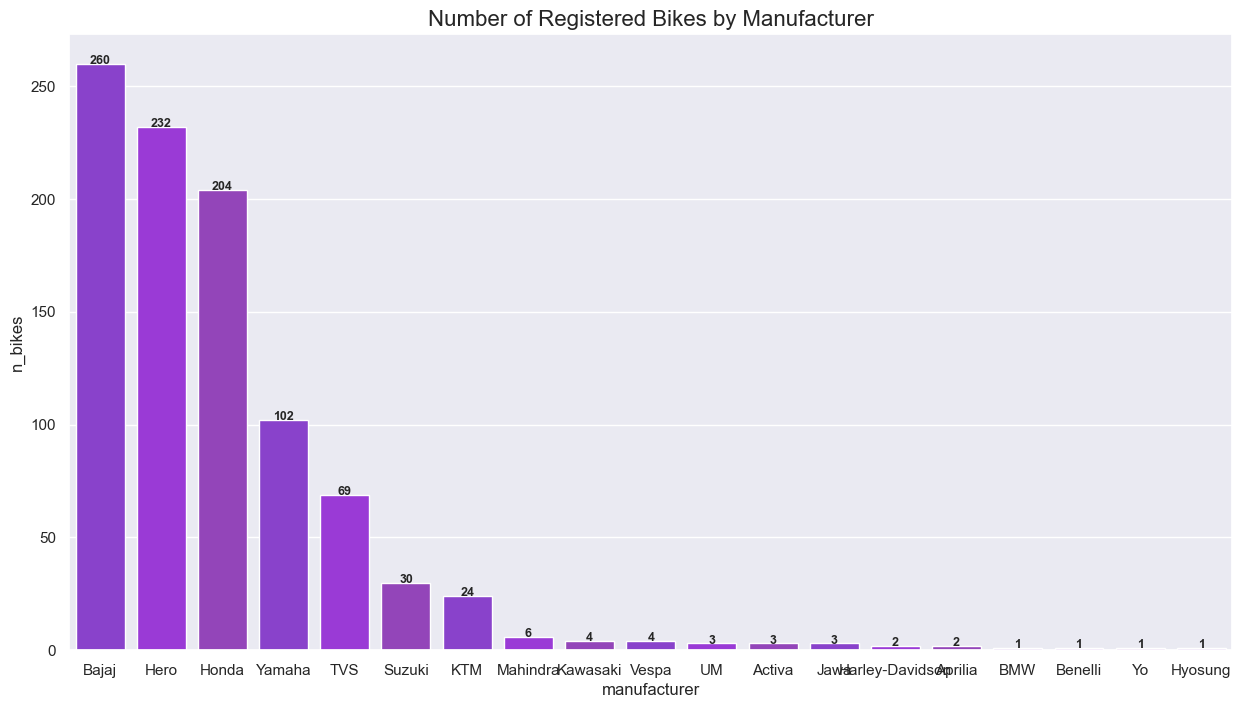

In [38]:
# get the number of registered motocycles by manufacturer
df_aux = pd.DataFrame(df4['manufacturer'].value_counts()).reset_index().rename(columns={'index':'manufacturer', 'manufacturer': 'n_bikes'})

# barplot
ax = sns.barplot(data=df_aux, x='manufacturer', y='n_bikes', palette=palette)
plt.title('Number of Registered Bikes by Manufacturer', fontsize=16)

# display value lables
for index, row in df_aux.iterrows():
    ax.text(index, row['n_bikes'], row['n_bikes'], ha='center', fontsize=9, fontweight='bold')

plt.show()

## 4.3 Third Round

### 1. Adjust the `name` column so that it only contains the name of the bike.


In [39]:
df4['name'] = df4.apply(lambda x: isolate_name(x['name'], x['manufacturer']), axis=1)
df4.head()

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,5k_kms,bike_age,manufacturer
0,0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,1,1,None
1,1,Dio,45000,2017,Individual,1st owner,5650,NaN,2,3,Honda
2,2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,3,2,None
3,3,Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,5,5,Yamaha
4,4,SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,5,9,Yamaha


### 2. Which manufacturer has the highest average price for their bikes?

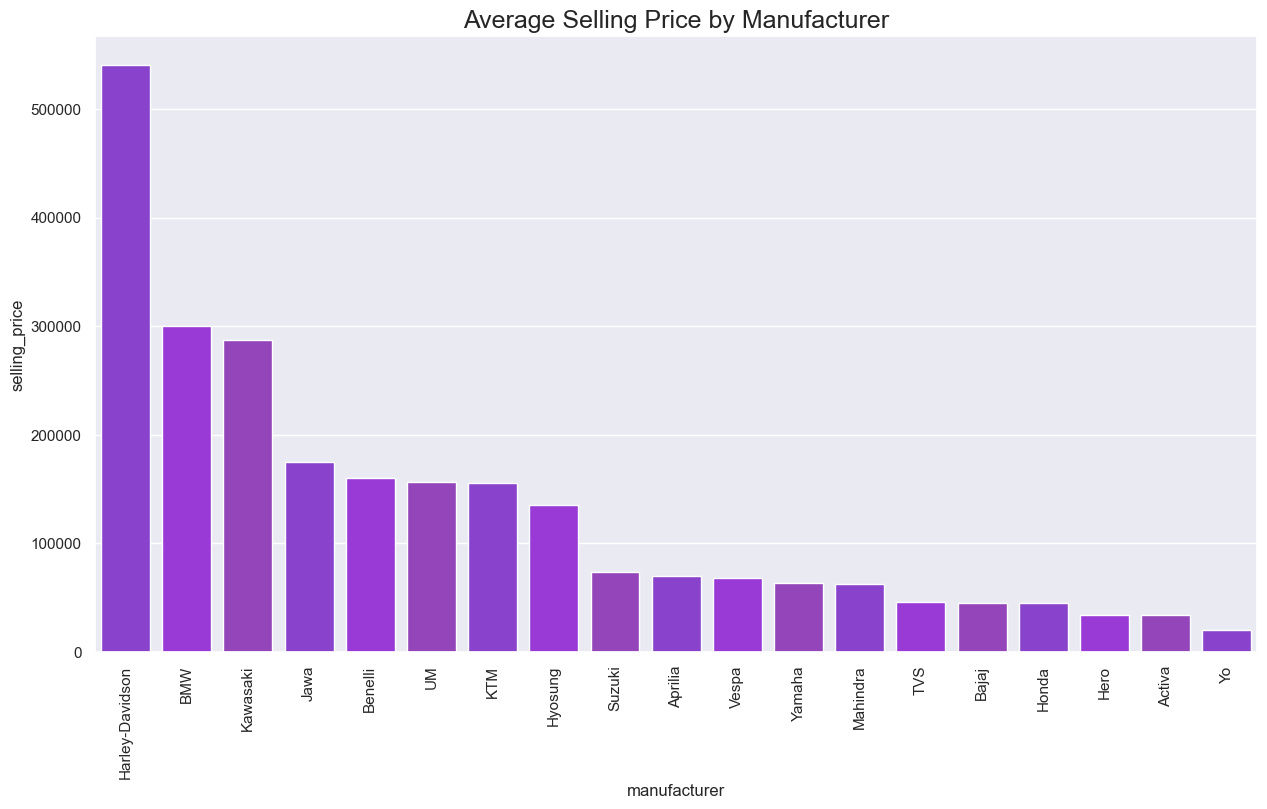

In [40]:
# get the average selling price by manufacturer
df_aux = df4[['manufacturer', 'selling_price']].groupby('manufacturer').mean().reset_index().sort_values(by='selling_price', ascending=False)

# define the regional setting for the wanted numerical format
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# barplot
ax = sns.barplot(data=df_aux, x='manufacturer', y='selling_price', palette=palette)
plt.title('Average Selling Price by Manufacturer', fontsize=18)
plt.xticks(rotation=90)

plt.show()

### 3. Which manufacturer has the bike with the highest mileage?

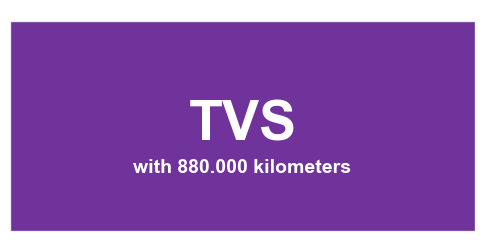

In [41]:
# get the manufacturer with the highest km_driven
df_aux = df4.loc[df4['km_driven'] == hst_km, ['manufacturer', 'km_driven']].reset_index(drop=True)

# set the regional setting for the wanted value format
locale.setlocale(locale.LC_ALL, '')

# obtain the manufacturer
manufacturer = df_aux['manufacturer'][0]

# creat an empty figure
plt.figure(figsize=(6, 3))

# remove axis
plt.axis('off')

# add a background color
plt.axhspan(0, 1, facecolor='indigo', alpha=0.8)

# plot number of motos
plt.text(x=0.5, y=0.5, s=str(manufacturer), ha='center', va ='center', fontsize=40, fontweight='bold', color='white')
plt.text(x=0.5, y=0.30, s=f'with {formatted_hst_km} kilometers', ha='center', va ='center', fontsize=14, fontweight='bold', color='white')

plt.show()

### 4. Which manufacturer has the oldest motorcycle?

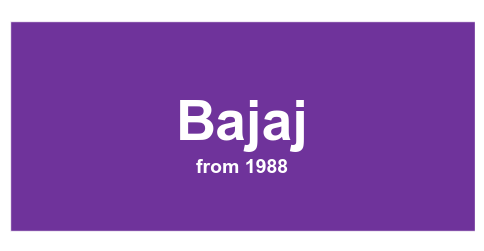

In [42]:
df_aux = df4.loc[df4['year'] == oldst_moto, ['manufacturer', 'year']].reset_index(drop=True)

# set the regional setting for the wanted value format
locale.setlocale(locale.LC_ALL, '')

# obtain the manufacturer
manufacturer = df_aux['manufacturer'][0]

# creat an empty figure
plt.figure(figsize=(6, 3))

# remove axis
plt.axis('off')

# add a background color
plt.axhspan(0, 1, facecolor='indigo', alpha=0.8)

# plot number of motos
plt.text(x=0.5, y=0.5, s=str(manufacturer), ha='center', va ='center', fontsize=40, fontweight='bold', color='white')
plt.text(x=0.5, y=0.30, s=f'from {oldst_moto}', ha='center', va ='center', fontsize=14, fontweight='bold', color='white')

plt.show()

### 5. The manufacturer with the most expensive motorcycle in the Dataset is also the manufacturer with the fewest registered motorcycles?

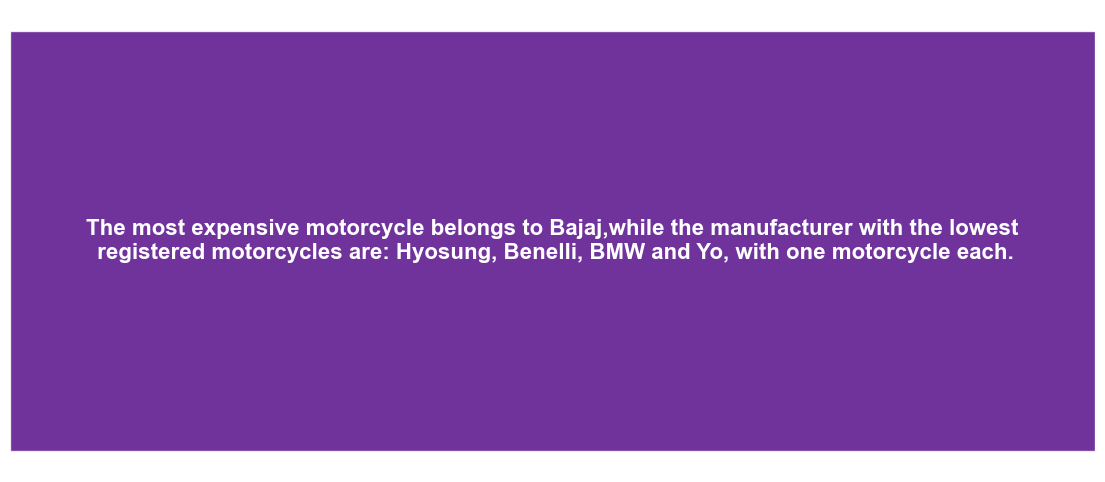

In [78]:
df_aux_1 = pd.DataFrame(df4['manufacturer'].value_counts()).reset_index().rename(columns={'index':'manufacturer', 'manufacturer': 'n_bikes'}).sort_values(by='n_bikes').reset_index(drop=True)
df_aux_2 = df4.loc[df4['selling_price'] == exp_moto, ['manufacturer', 'selling_price']].reset_index(drop=True)

# get manufacturers
most_expensive_manu = df_aux_2['manufacturer'][0]
lowest_registered = 'Hyosung, Benelli, BMW and Yo, with one motorcycle each'

# write text
text = f'The most expensive motorcycle belongs to {str(manufacturer)},while the manufacturer with the lowest\n registered motorcycles are: Hyosung, Benelli, BMW and Yo, with one motorcycle each.'

# creat an empty figure
plt.figure(figsize=(14, 6))

# remove axis
plt.axis('off')

# add a background color
plt.axhspan(0, 1, facecolor='indigo', alpha=0.8)

# plot number of motos
plt.text(x=0.5, y=0.5, s=text, ha='center', va ='center', fontsize=16, fontweight='bold', color='white')
#plt.text(x=0.5, y=0.30, s=lowest_registered, ha='center', va ='center', fontsize=24, fontweight='bold', color='white')

plt.show()

### 7. Which bikes should I buy?

- Bear in mind that I want motorcycles that are no more than 3 years old; have no more than 40,000 kilometers on the clock; have only one owner; are being sold by individuals and have a sales price lower than the showroom price. Send a report containing the model, selling price, mileage and year, sorted by selling price in descending order to my e-mail address.

In [46]:
# Treating missing values in "ex_showroom_price", applying the selling price. This way, motorcycles that have missing showroom price, will be recommended with the selling price
df4['ex_showroom_price'] = df4.apply(lambda x: x['selling_price'] if pd.isnull(x['ex_showroom_price']) else x['ex_showroom_price'], axis=1)

In [47]:
filter = (df4['bike_age'] < 4) & (df4['km_driven'] <= 40000) & (df4['owner'] == '1st owner') & (df4['seller_type'] == 'Individual') & (df4['selling_price'] <= df4['ex_showroom_price'])

bikes = df4[filter][['name', 'manufacturer', 'selling_price', 'km_driven', 'year']].sort_values(by='selling_price', ascending=False).reset_index(drop=True)

In [79]:
bikes

,name,manufacturer,selling_price,km_driven,year
0,G310GS,BMW,300000,2500,2018
1,Royal Enfield Continental GT 650,None,299000,1500,2019
2,Royal Enfield Interceptor 650,None,285000,5500,2019
3,Royal Enfield Interceptor 650,None,270000,9000,2019
4,RC 390,KTM,270000,2380,2019
...,...,...,...,...,...
282,Dream Yuga,Honda,32000,39000,2017
283,Scooty Zest 110,TVS,30000,9432,2017
284,Platina 100,Bajaj,30000,37000,2018
285,XL 100,TVS,30000,8000,2017


In [48]:
bikes.to_csv('../data/exported/bikes.xlsx', index = False)